# Fashion MNIST

In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices())

# tf.keras.utils.set_random_seed(812)
# tf.config.experimental.enable_op_determinism()
import gc
class FreeMemory(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'epoch {epoch} ended, info: {logs}')
        tf.keras.backend.clear_session()
        gc.collect()

2023-10-10 19:11:12.936609: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-10-10 19:11:15.785336: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-10 19:11:15.804236: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-10 19:11:15.804497: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
PX_ROWS = 28
PX_COLS = 28
CLASSES_NUM = 10
EPOCHS_NUM = 10

from tensorflow.keras.optimizers import SGD, Adam
OPTIMIZER = lambda: Adam()
# OPTIMIZER = lambda: SGD(learning_rate=0.01, momentum=0.01)

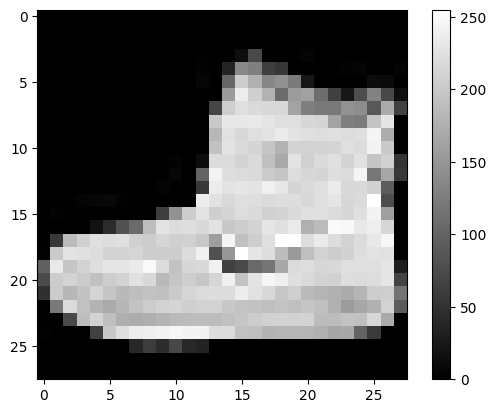

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0], cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.show()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

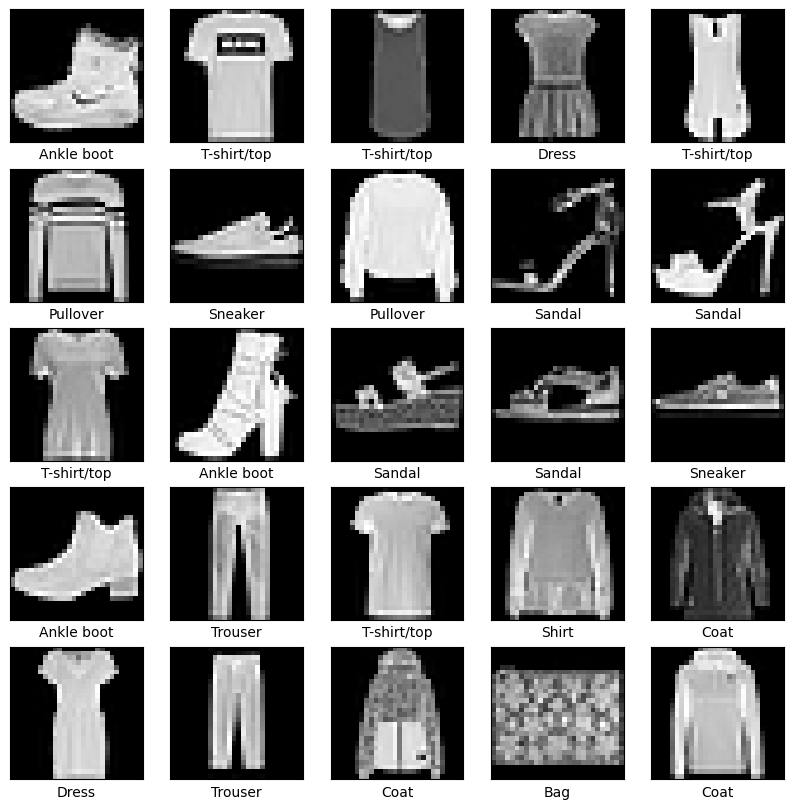

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## RVMLPNN

In [7]:
RVMLPNN_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(PX_ROWS, PX_COLS,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2023-10-10 19:11:20.359697: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-10 19:11:20.359998: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-10 19:11:20.360190: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-10 19:11:21.353370: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-10 19:11:21.353665: I tensorflow/compile

In [8]:
RVMLPNN_model.compile(optimizer=OPTIMIZER(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
RVMLPNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    


                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
RVMLPNN_history = RVMLPNN_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=EPOCHS_NUM, verbose=0, callbacks=[FreeMemory()])
RVMLPNN_model.evaluate(test_images, test_labels, verbose=2)

2023-10-10 19:11:24.107836: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-10 19:11:24.313996: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fc49263ffe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-10 19:11:24.314040: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-10-10 19:11:24.346678: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-10 19:11:24.566150: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-10 19:11:24.764337: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

epoch 0 ended, info: {'loss': 0.5006733536720276, 'accuracy': 0.8233333230018616, 'val_loss': 0.4590693414211273, 'val_accuracy': 0.8356999754905701}
epoch 1 ended, info: {'loss': 0.3754359781742096, 'accuracy': 0.8639833331108093, 'val_loss': 0.3840605616569519, 'val_accuracy': 0.8640999794006348}
epoch 2 ended, info: {'loss': 0.3350297212600708, 'accuracy': 0.8768500089645386, 'val_loss': 0.38439062237739563, 'val_accuracy': 0.8646000027656555}
epoch 3 ended, info: {'loss': 0.309299111366272, 'accuracy': 0.8871166706085205, 'val_loss': 0.3914620280265808, 'val_accuracy': 0.8587999939918518}
epoch 4 ended, info: {'loss': 0.2953580319881439, 'accuracy': 0.8888499736785889, 'val_loss': 0.3391411006450653, 'val_accuracy': 0.8783000111579895}
epoch 5 ended, info: {'loss': 0.2800394296646118, 'accuracy': 0.8962166905403137, 'val_loss': 0.35495108366012573, 'val_accuracy': 0.8709999918937683}
epoch 6 ended, info: {'loss': 0.2671562731266022, 'accuracy': 0.8999500274658203, 'val_loss': 0.332

[0.342843234539032, 0.8816999793052673]

## RVCNN

In [10]:
train_reshaped = train_images.reshape(train_images.shape[0], PX_COLS, PX_ROWS, 1)
test_reshaped = test_images.reshape(test_images.shape[0], PX_COLS, PX_ROWS, 1)

In [11]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

RVCNN_model = tf.keras.Sequential()
RVCNN_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(PX_ROWS, PX_COLS, 1))) 
RVCNN_model.add(MaxPooling2D(pool_size=2))
RVCNN_model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
RVCNN_model.add(MaxPooling2D(pool_size=2))
RVCNN_model.add(Flatten())
RVCNN_model.add(Dense(256, activation='relu'))
RVCNN_model.add(Dropout(0.5))
RVCNN_model.add(Dense(CLASSES_NUM, activation='softmax'))


RVCNN_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=OPTIMIZER(),
              metrics=['accuracy'])
RVCNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 256)               4

In [12]:
RVCNN_history = RVCNN_model.fit(train_reshaped, train_labels, validation_data=(test_reshaped, test_labels), batch_size=100, epochs=EPOCHS_NUM, verbose=0, callbacks=[FreeMemory()])
RVCNN_model.evaluate(test_reshaped, test_labels, verbose=2)

epoch 0 ended, info: {'loss': 0.5374515652656555, 'accuracy': 0.8050833344459534, 'val_loss': 0.3490460216999054, 'val_accuracy': 0.8762000203132629}
epoch 1 ended, info: {'loss': 0.3452681601047516, 'accuracy': 0.8748000264167786, 'val_loss': 0.3130890727043152, 'val_accuracy': 0.8841000199317932}
epoch 2 ended, info: {'loss': 0.3088681995868683, 'accuracy': 0.8876166939735413, 'val_loss': 0.28375348448753357, 'val_accuracy': 0.8938999772071838}
epoch 3 ended, info: {'loss': 0.2806892395019531, 'accuracy': 0.8976166844367981, 'val_loss': 0.267032653093338, 'val_accuracy': 0.9013000130653381}
epoch 4 ended, info: {'loss': 0.2594524919986725, 'accuracy': 0.9033833146095276, 'val_loss': 0.259482741355896, 'val_accuracy': 0.9035999774932861}
epoch 5 ended, info: {'loss': 0.2444102168083191, 'accuracy': 0.9104833602905273, 'val_loss': 0.25914299488067627, 'val_accuracy': 0.9053000211715698}
epoch 6 ended, info: {'loss': 0.22968587279319763, 'accuracy': 0.9147166609764099, 'val_loss': 0.246

[0.22880497574806213, 0.9185000061988831]

## CVMLPNN

In [13]:
from cvnn import layers
import numpy as np

CVMLPNN_model = tf.keras.Sequential([
    layers.ComplexFlatten(input_shape=(PX_ROWS, PX_COLS,)),
    layers.ComplexDense(128, activation='cart_relu', dtype=np.float32),
    layers.ComplexDense(10, dtype=np.float32)
])

In [14]:
CVMLPNN_model.compile(optimizer=OPTIMIZER(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
CVMLPNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_flatten (ComplexFl  (None, 784)               0         
 atten)                                                          
                                                                 
 complex_dense (ComplexDens  (None, 128)               100480    
 e)                                                              
                                                                 
 complex_dense_1 (ComplexDe  (None, 10)                1290      
 nse)                                                            
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
CVMLPNN_history = CVMLPNN_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=EPOCHS_NUM, verbose=0, callbacks=[FreeMemory()])
CVMLPNN_model.evaluate(test_images, test_labels, verbose=2)

epoch 0 ended, info: {'loss': 0.4904854893684387, 'accuracy': 0.8269833326339722, 'val_loss': 0.4350145161151886, 'val_accuracy': 0.8439000248908997}
epoch 1 ended, info: {'loss': 0.3723007142543793, 'accuracy': 0.8654500246047974, 'val_loss': 0.430880606174469, 'val_accuracy': 0.8507000207901001}
epoch 2 ended, info: {'loss': 0.3355834186077118, 'accuracy': 0.87663334608078, 'val_loss': 0.3745918571949005, 'val_accuracy': 0.868399977684021}
epoch 3 ended, info: {'loss': 0.3112707734107971, 'accuracy': 0.8847500085830688, 'val_loss': 0.3639752268791199, 'val_accuracy': 0.8682000041007996}
epoch 4 ended, info: {'loss': 0.29338425397872925, 'accuracy': 0.8920833468437195, 'val_loss': 0.3451465368270874, 'val_accuracy': 0.8745999932289124}
epoch 5 ended, info: {'loss': 0.2801433205604553, 'accuracy': 0.8963333368301392, 'val_loss': 0.3465777039527893, 'val_accuracy': 0.8783000111579895}
epoch 6 ended, info: {'loss': 0.2675766944885254, 'accuracy': 0.9006500244140625, 'val_loss': 0.3449126

[0.3370762765407562, 0.8827000260353088]

## CNCNN

In [16]:
CNCNN_model = tf.keras.Sequential()
# conv_model.add(layers.ComplexInput(input_shape=((PX_ROWS, PX_COLS, 1))))
CNCNN_model.add(layers.ComplexConv2D(filters=64, kernel_size=2, padding='same', activation='cart_relu', input_shape=(PX_ROWS, PX_COLS, 1), dtype=np.float32)) 
CNCNN_model.add(layers.ComplexMaxPooling2D(pool_size=2, dtype=np.float32))
CNCNN_model.add(layers.ComplexConv2D(filters=32, kernel_size=2, padding='same', activation='cart_relu', dtype=np.float32))
CNCNN_model.add(layers.ComplexMaxPooling2D(pool_size=2, dtype=np.float32))
CNCNN_model.add(layers.ComplexFlatten())
CNCNN_model.add(layers.ComplexDense(256, activation='cart_relu', dtype=np.float32))
CNCNN_model.add(Dropout(0.5))
CNCNN_model.add(layers.ComplexDense(CLASSES_NUM, activation='cart_softmax', dtype=np.float32))


CNCNN_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=OPTIMIZER(),
              metrics=['accuracy'])
CNCNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_conv2d (ComplexCon  (None, 28, 28, 64)        320       
 v2D)                                                            
                                                                 
 complex_max_pooling2d (Com  (None, 14, 14, 64)        0         
 plexMaxPooling2D)                                               
                                                                 
 complex_conv2d_1 (ComplexC  (None, 14, 14, 32)        8224      
 onv2D)                                                          
                                                                 
 complex_max_pooling2d_1 (C  (None, 7, 7, 32)          0         
 omplexMaxPooling2D)                                             
                                                                 
 complex_flatten (ComplexFl  (None, 1568)              0

In [17]:
CNCNN_history = CNCNN_model.fit(train_reshaped, train_labels, validation_data=(test_reshaped, test_labels), batch_size=100, epochs=EPOCHS_NUM, verbose=0, callbacks=[FreeMemory()])
CNCNN_model.evaluate(test_reshaped, test_labels, verbose=2)

epoch 0 ended, info: {'loss': 0.5347583889961243, 'accuracy': 0.8087999820709229, 'val_loss': 0.3625207841396332, 'val_accuracy': 0.8669999837875366}
epoch 1 ended, info: {'loss': 0.3470268249511719, 'accuracy': 0.8755000233650208, 'val_loss': 0.3066616952419281, 'val_accuracy': 0.8895000219345093}
epoch 2 ended, info: {'loss': 0.30563265085220337, 'accuracy': 0.8896833062171936, 'val_loss': 0.2915695905685425, 'val_accuracy': 0.8903999924659729}
epoch 3 ended, info: {'loss': 0.27908456325531006, 'accuracy': 0.8982999920845032, 'val_loss': 0.2736441195011139, 'val_accuracy': 0.8986999988555908}
epoch 4 ended, info: {'loss': 0.25825878977775574, 'accuracy': 0.905916690826416, 'val_loss': 0.2543834447860718, 'val_accuracy': 0.9041000008583069}
epoch 5 ended, info: {'loss': 0.24300384521484375, 'accuracy': 0.911050021648407, 'val_loss': 0.25313204526901245, 'val_accuracy': 0.9074000120162964}
epoch 6 ended, info: {'loss': 0.22641147673130035, 'accuracy': 0.9171500205993652, 'val_loss': 0.

[0.23295994102954865, 0.9172000288963318]

## CVMLPNN - complex input

In [18]:
import numpy as np
from cvnn import layers

train_fourier = np.fft.fft2(train_images)
test_fourier = np.fft.fft2(test_images)

max_abs = np.abs(train_fourier).max()
train_fourier = train_fourier / max_abs
test_fourier = test_fourier / max_abs
print('max_abs:', max_abs)

max_abs: 589.7529411764706


In [19]:
CVMLPNN_model = tf.keras.Sequential([
    layers.ComplexInput(input_shape=(PX_ROWS, PX_COLS,)),
    layers.ComplexFlatten(),
    layers.ComplexDense(64, activation='cart_relu'),
    layers.ComplexDense(10, activation='sigmoid_real'),
])

CVMLPNN_model.compile(optimizer=OPTIMIZER(),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
CVMLPNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_flatten (ComplexFl  (None, 784)               0         
 atten)                                                          
                                                                 
 complex_dense (ComplexDens  (None, 64)                100480    
 e)                                                              
                                                                 
 complex_dense_1 (ComplexDe  (None, 10)                1300      
 nse)                                                            
                                                                 
Total params: 101780 (397.58 KB)
Trainable params: 101780 (397.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
CVMLPNN_history = CVMLPNN_model.fit(train_fourier, train_labels, validation_data=(test_fourier, test_labels), epochs=EPOCHS_NUM, verbose=0, callbacks=[FreeMemory()])
CVMLPNN_model.evaluate(test_fourier, test_labels, verbose=2)

2023-10-10 19:14:46.070032: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 752640000 exceeds 10% of free system memory.
2023-10-10 19:14:46.525334: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 752640000 exceeds 10% of free system memory.


epoch 0 ended, info: {'loss': 0.6355619430541992, 'accuracy': 0.8040500283241272, 'val_loss': 0.4731001853942871, 'val_accuracy': 0.8300999999046326}
epoch 1 ended, info: {'loss': 0.42102348804473877, 'accuracy': 0.8529166579246521, 'val_loss': 0.4389282166957855, 'val_accuracy': 0.8449000120162964}
epoch 2 ended, info: {'loss': 0.38515180349349976, 'accuracy': 0.8638666868209839, 'val_loss': 0.41766634583473206, 'val_accuracy': 0.8489999771118164}
epoch 3 ended, info: {'loss': 0.3592396378517151, 'accuracy': 0.8730499744415283, 'val_loss': 0.402014821767807, 'val_accuracy': 0.8551999926567078}
epoch 4 ended, info: {'loss': 0.3373606204986572, 'accuracy': 0.8812166452407837, 'val_loss': 0.38702884316444397, 'val_accuracy': 0.8580999970436096}
epoch 5 ended, info: {'loss': 0.31877925992012024, 'accuracy': 0.8865166902542114, 'val_loss': 0.3817676901817322, 'val_accuracy': 0.8622999787330627}
epoch 6 ended, info: {'loss': 0.3019203841686249, 'accuracy': 0.8926833271980286, 'val_loss': 0.

[0.35839274525642395, 0.8712999820709229]

## CVCNN - complex input

In [27]:
from cvnn.metrics import ComplexCategoricalAccuracy
from cvnn.losses import ComplexAverageCrossEntropy
from cvnn import layers

CVCNN_model = tf.keras.Sequential()
CVCNN_model.add(layers.ComplexInput(input_shape=((PX_ROWS, PX_COLS, 1))))
CVCNN_model.add(layers.ComplexConv2D(filters=64, kernel_size=2, padding='same', activation='cart_relu')) 
CVCNN_model.add(layers.ComplexMaxPooling2D(pool_size=2))
CVCNN_model.add(layers.ComplexConv2D(filters=32, kernel_size=2, padding='same', activation='cart_relu'))
CVCNN_model.add(layers.ComplexMaxPooling2D(pool_size=2))
CVCNN_model.add(layers.ComplexFlatten())
CVCNN_model.add(layers.ComplexDense(256, activation='cart_relu'))
CVCNN_model.add(layers.ComplexDropout(0.5))
CVCNN_model.add(layers.ComplexDense(CLASSES_NUM, activation='cart_softmax'))


CVCNN_model.compile(loss=ComplexAverageCrossEntropy(),#'sparse_categorical_crossentropy',
              optimizer=OPTIMIZER(),
              metrics=[ComplexCategoricalAccuracy(name='accuracy')])#'accuracy'])
CVCNN_model.summary()

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_conv2d (ComplexCon  (None, 28, 28, 64)        640       
 v2D)                                                            
                                                                 
 complex_max_pooling2d (Com  (None, 14, 14, 64)        0         
 plexMaxPooling2D)                                               
                                                                 
 complex_conv2d_1 (ComplexC  (None, 14, 14, 32)        16448     
 onv2D)                                                          
                                                                 
 complex_max_pooling2d_1 (C  (None, 7, 7, 32)          0         
 omplexMaxPooling2D)                                             
                                                                 
 complex_flatten (ComplexFl  (None, 1568)              0

In [28]:
one_hot_train = tf.one_hot(train_labels, CLASSES_NUM)
one_hot_test = tf.one_hot(test_labels, CLASSES_NUM)

CVCNN_history = CVCNN_model.fit(train_fourier, one_hot_train, validation_data=(test_fourier, one_hot_test), batch_size=100, epochs=EPOCHS_NUM, verbose=0, callbacks=[FreeMemory()])
CVCNN_model.evaluate(test_fourier, one_hot_test, verbose=2)

2023-10-10 19:17:02.394480: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 752640000 exceeds 10% of free system memory.
2023-10-10 19:17:02.977210: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 752640000 exceeds 10% of free system memory.


epoch 0 ended, info: {'loss': 0.8151504397392273, 'accuracy': 0.7182833552360535, 'val_loss': 0.49568086862564087, 'val_accuracy': 0.8213000297546387}
epoch 1 ended, info: {'loss': 0.4660002589225769, 'accuracy': 0.8350499868392944, 'val_loss': 0.4147338271141052, 'val_accuracy': 0.8518000245094299}
epoch 2 ended, info: {'loss': 0.3993445336818695, 'accuracy': 0.8567166924476624, 'val_loss': 0.3754359483718872, 'val_accuracy': 0.8607000112533569}
epoch 3 ended, info: {'loss': 0.35964658856391907, 'accuracy': 0.8686666488647461, 'val_loss': 0.3580630421638489, 'val_accuracy': 0.8695999979972839}
epoch 4 ended, info: {'loss': 0.3347991108894348, 'accuracy': 0.878933310508728, 'val_loss': 0.35151898860931396, 'val_accuracy': 0.8726999759674072}
epoch 5 ended, info: {'loss': 0.31506744027137756, 'accuracy': 0.8847000002861023, 'val_loss': 0.3324504494667053, 'val_accuracy': 0.8790000081062317}
epoch 6 ended, info: {'loss': 0.30219221115112305, 'accuracy': 0.8893333077430725, 'val_loss': 0.

[0.31437674164772034, 0.8859999775886536]

## Comaprision

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
    
def make_dataframe(fit_history):
    df = pd.DataFrame(fit_history.history)
    df['epoch'] = fit_history.epoch
    return df

def plot_loss_history_comparision(rvnn_fit_history, cvnn_fit_history, scale_upper_bound = 1):
    
    rvnn_dataframe = make_dataframe(rvnn_fit_history)
    cvnn_dataframe = make_dataframe(cvnn_fit_history)
    
    upper_bound = 2*np.median(np.concatenate((rvnn_dataframe['loss'].values, rvnn_dataframe['val_loss'].values, cvnn_dataframe['loss'].values, cvnn_dataframe['val_loss'].values)))
    # upper_bound = 2*np.median(np.concatenate((rvnn_dataframe['loss'].values, cvnn_dataframe['loss'].values)))
    
    plt.figure()
    plt.ylim((0, scale_upper_bound*upper_bound))
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['loss'], label='CVNN training set')
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['val_loss'], linestyle='dashed', label='CVNN validation set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['loss'], label='RVNN training set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['val_loss'], linestyle='dashed', label='RVNN validation set')
    plt.legend(loc="lower left")
    plt.xlabel("epoch no.")
    plt.ylabel("loss value")
    plt.show()

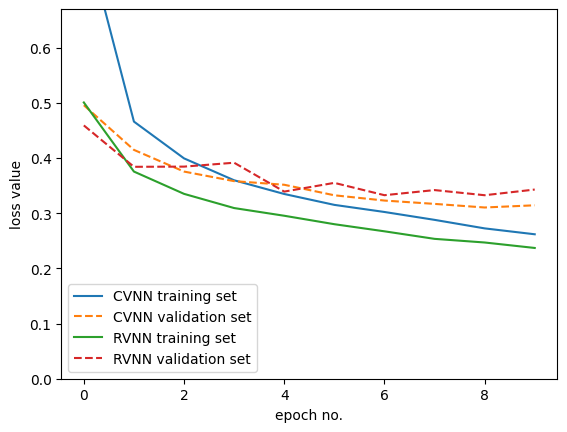

In [29]:
plot_loss_history_comparision(RVMLPNN_history, CVCNN_history)

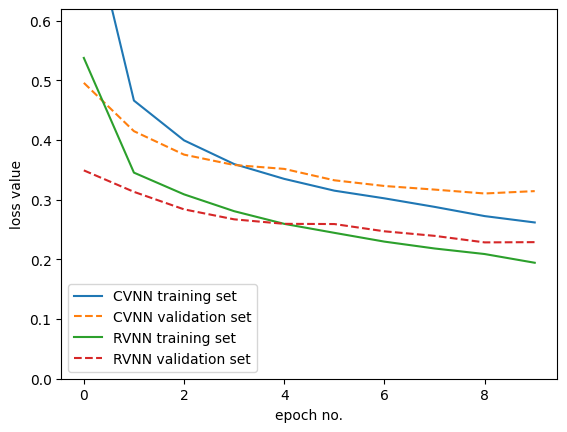

In [30]:
plot_loss_history_comparision(RVCNN_history, CVCNN_history)